In [1]:
%load_ext autoreload
%autoreload 2

import anndata as ad
import matplotlib.pyplot as plt

from commando import ComManDo
from commando.utilities import visualize_mapping

2021-11-08 17:54:09.817016: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-08 17:54:09.817054: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


# Read Data

In [2]:
data_mod1 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_phase1/openproblems_bmmc_multiome_phase1.censor_dataset.output_mod1.h5ad')
data_mod2 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_phase1/openproblems_bmmc_multiome_phase1.censor_dataset.output_mod2.h5ad')

# data_mod1 = ad.read_h5ad('OPSCA/openproblems_bmmc_cite_phase1/openproblems_bmmc_cite_phase1.censor_dataset.output_mod1.h5ad')
# data_mod2 = ad.read_h5ad('OPSCA/openproblems_bmmc_cite_phase1/openproblems_bmmc_cite_phase1.censor_dataset.output_mod2.h5ad')

In [3]:
# X1 = data_mod1.X[:, :1000]
# X2 = data_mod2.X[:, :10000]
X1 = data_mod1.X
X2 = data_mod2.X

# Run Mapping

### CITE

Laplacian: 5m46s

Construction: 6m30s

Eigenvectors: NA

110Gb (148Gb virtual)

Uses ~5.4Gb (22.4Gb virtual) during calculation with Jupyter Lab

Died on 80Gb instance with 66Gb res and 80Gb+ virtual

141 partitions

1000 epochs for each F

### MULTIOME

23Gb (30Gb virtual) at construction time

32Gb (45Gb virtual) peak during eig calculation

### During Submission Run

#### CITE

TBT

#### MULTIOME

TBT

### Notes

GPU should have fewer partitions due to better parallelization

Time is after the event (ex. Laplacian: 1m means the laplacian step was finished after 1m total runtime of the program)

In [4]:
commando_out = (
    ComManDo(
        distance_mode='spearman',
        two_step_aggregation = 'random',
        # epoch_pd=1,
        # two_step_pd_large=1,
        epoch_pd=1000,
        two_step_pd_large=1000,
        log_pd=1000,
        two_step_num_partitions=141,
    )
    .fit_transform([X1, X2])
)

use random seed: 666
Two-Step group sizes
Min: 159
Max: 160
Shape of Raw data
Dataset 0: (22463, 13431)
Dataset 1: (22463, 116490)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 1
Calculating intra-group F #14
epoch:[1000/1000] err:0.0388 alpha:0.9700
Calculating intra-group F #28
epoch:[1000/1000] err:0.0392 alpha:0.9699
Calculating intra-group F #42
epoch:[1000/1000] err:0.0406 alpha:0.9692
Calculating intra-group F #56
epoch:[1000/1000] err:0.0395 alpha:0.9696
Calculating intra-group F #70
epoch:[1000/1000] err:0.0398 alpha:0.9695
Calculating intra-group F #84
epoch:[1000/1000] err:0.0398 alpha:0.9696
Calculating intra-group F #98
epoch:[1000/1000] err:0.0405 alpha:0.9692
Calculating intra-group F #112
epoch:[1000/1000] err:0.0395 alpha:0.9698
Calculating intra-group F #126
epoch:[1000/1000] err:0.0395 alpha:0.9696
Calculating intra-group F #140
epoch:[1000/1000] err:0.0392 alpha:0.9697
Calculating inter-group F
epoch:[1000/1000] err:

# Evaluate

ComManDo Pairwise Error: 0.40288586826949313


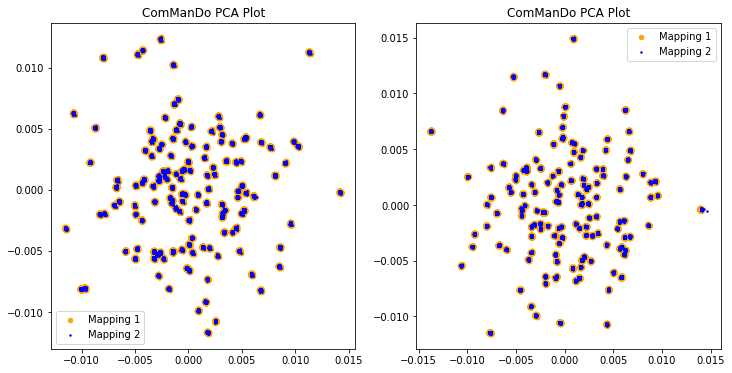

In [23]:
print('ComManDo Pairwise Error: ' + str(pairwise_error(*commando_out, normalize_by_feature=True)))
plt.subplots(figsize=(12, 6))
plt.subplot(1, 2, 1)
visualize_mapping(commando_out, 0)
plt.subplot(1, 2, 2)
visualize_mapping(commando_out, 1)